In [14]:
#!pip install PyPDF2
!pip install py-readability-metrics
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from PyPDF2 import PdfReader
from readability import Readability

  Using cached py_readability_metrics-1.4.5-py3-none-any.whl (26 kB)


In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/owenguglielmino/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/owenguglielmino/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/owenguglielmino/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Both articles discuss the recent allegations of plagiarism against Harvard president Claudine Gay. These accusations carry a lot of weight, as they come in the wake of accusations against Gay regarding antisemitism and other accusations of plagiarism. After reading the two articles, Reuters seems to have been a bit more impartial and focused on unbiased presentation of facts, while Fox was a bit more negative in tone. 

In [4]:
reader = PdfReader('reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf')
text = ''
for page in reader.pages:
    text += page.extract_text()
text

'1 / 3Gabriella BorterHarvard president will submit dissertation edits after\nplagiarism allegations\nreuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21\nHarvard University President Claudine Gay testifies before a House Education and The\nWorkforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting\nAntisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken\nCedeno/File Photo Acquire Licensing Rights\nDec 21 (Reuters) - Harvard University\'s president was planning to submit three corrections to\nher 1997 dissertation after a committee investigating plagiarism allegations against her found\nthat she had made citation errors, a university spokesperson said.\nClaudine Gay , who was inaugurated as Harvard\'s president in September , has already\nsubmitted corrections to two published articles in recent weeks that were the focus of a\nreview by the Harvard Corporation, the university\

In [5]:
reader2 = PdfReader('foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf')
text2 = ''
for page in reader2.pages:
    text2 += page.extract_text()
text2

'1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit\nwith more plagiarism charges\nfoxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges\nMedia\nHarvard ‘received a complaint outlining over 40 allegations of\nplagiarism,’ according to the Free Beacon\n By Brian Flood  Fox News\nPublished December 20, 2023 12:59pm EST\nHarvard president facing 40 new allegations of plagiarism\nFox News\' Molly Line reports the latest on the allegations. \nEmbattled Harvard University President Claudine Gay  has been slapped with additional\ncharges of plagiarism. \nThe Washington Free Beacon  reported Harvard "received a complaint outlining over 40\nallegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard\'s\nresearch integrity of ficer, Stacey Springs, outlining the claims. \n"The document paints a picture of a pattern of misconduct more extensive than has been\npreviously reported and puts the Harvard Cor

As far as anomalies go, there isn't anything particularly glaring after extracting the text from both pdf's. The extraction including '\n' denoting new lines in the text, as well as a few random buttons and messages such as 'Scroll to Continue'. This might be due to the articles being in PDF format instead of a strictly text-based format like an html or word doc file.

In [6]:
tokenizer = RegexpTokenizer(r"\w+")
text = tokenizer.tokenize(text)
text = " ".join([word for word in text if word not in nltk.corpus.stopwords.words('english')])
text

'1 3Gabriella BorterHarvard president submit dissertation edits plagiarism allegations reuters com world us embattled harvard president submit dissertation edits plagiarism 2023 12 21 Harvard University President Claudine Gay testifies House Education The Workforce Committee hearing titled Holding Campus Leaders Accountable Confronting Antisemitism Capitol Hill W ashington U S December 5 2023 REUTERS Ken Cedeno File Photo Acquire Licensing Rights Dec 21 Reuters Harvard University president planning submit three corrections 1997 dissertation committee investigating plagiarism allegations found made citation errors university spokesperson said Claudine Gay inaugurated Harvard president September already submitted corrections two published articles recent weeks focus review Harvard Corporation university governing board Advertisement Scroll continue2 3Questions Gay academic integrity rocked already tumultuous first semester university first Black president faced pressure campaign resign c

In [7]:
text2 = tokenizer.tokenize(text2)
text2 = " ".join([word for word in text2 if word not in nltk.corpus.stopwords.words('english')])
text2

'1 5Brian FloodEmbattled Harvard University President Claudine Gay hit plagiarism charges foxnews com media embattled harvard university president claudine gay hit plagiarism charges Media Harvard received complaint outlining 40 allegations plagiarism according Free Beacon By Brian Flood Fox News Published December 20 2023 12 59pm EST Harvard president facing 40 new allegations plagiarism Fox News Molly Line reports latest allegations Embattled Harvard University President Claudine Gay slapped additional charges plagiarism The Washington Free Beacon reported Harvard received complaint outlining 40 allegations plagiarism Gay T uesday noting letter sent Harvard research integrity ficer Stacey Springs outlining claims The document paints picture pattern misconduct extensive previously reported puts Harvard Corporation university governing body said initiated independent review Gay scholarship issued statement support leadership back spotlight Free Beacon reporter Aaron Sibarium wrote HAR 

In [8]:
#Sentiment Analysis
sid = SentimentIntensityAnalyzer()
print(sid.polarity_scores(text))
print(sid.polarity_scores(text2))

{'neg': 0.091, 'neu': 0.887, 'pos': 0.022, 'compound': -0.9735}
{'neg': 0.089, 'neu': 0.815, 'pos': 0.096, 'compound': 0.7354}


From the above sentiment analysis results, both articles are rated as being predominantly neutral. For the Reuters article, this is not surprising, as Reuters holds a rather neutral reputation in their reporting. However, I am a bit surprised by Fox being rated as neutral. Even from just reading the article myself, many of the adjectives and the action verbs in particular (slapped, hit) were more negative in tone. Given Fox's reputation for leaning right, this isn't a surprise, but it is somewhat surprising that the results of the sentiment analysis are neutral. #

In [10]:
#Analysis of Headlines
reuters_head = 'Harvard president will submit dissertation edits after plagiarism allegations'
fox_head = 'Embattled Harvard University President Claudine Gay hit with more plagiarism charges'

print(sid.polarity_scores(reuters_head))
print(sid.polarity_scores(fox_head))


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}


These results agree with the general sentiment analysis. There are relatively marginal differences between both analyses. With the headline analysis, I am surprised that Fox was again rated neutrally, as the use of words like 'Embattled', 'hit', and 'charges' seem to give a more negative tone to me. 

In [16]:
#Py-Readability-Metrics for readability scores
reuters = Readability(text)
fox = Readability(text2)

#First is Flesch Kincaid Grade Level. This metric assesses each text and determines what grade level the reading is
print(reuters.flesch_kincaid())
print(fox.flesch_kincaid())

score: 152.24919571045578, grade_level: '152'
score: 226.97285714285715, grade_level: '227'


Based on these results, we can see that the Fox article has both a higher score and higher grade level than the Reuters article. This tells us that the Fox article is more complex in nature, and uses more intricate grammar and vocabulary.

In [17]:
#Flesch Reading Ease. This metric gives a score that reflects the overall ease of reading for the text.
print(reuters.flesch())
print(fox.flesch())

score: -358.8779624664879, ease: 'very_confusing', grade_levels: ['college_graduate']
score: -551.017857142857, ease: 'very_confusing', grade_levels: ['college_graduate']


These results are similar to the Flesch-Kincaid results. Both articles are rated as being difficult to understand, and at the college_graduate level of reading. Again, Fox scored higher in complexity.

In [18]:
#Creating Wordclouds with wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

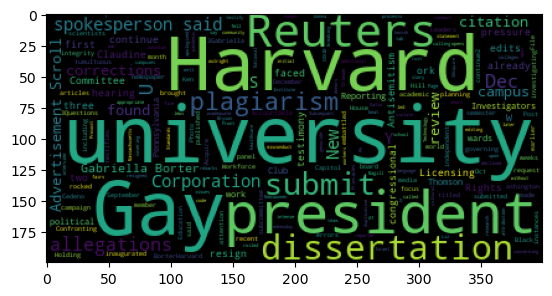

In [21]:
reuters_cloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(reuters_cloud)

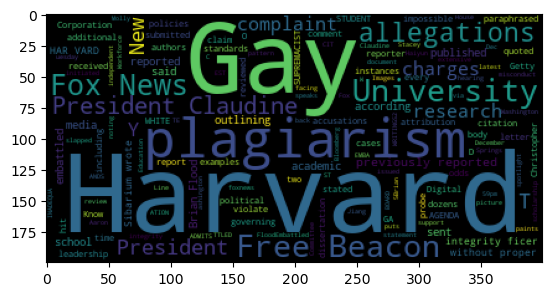

In [22]:
fox_cloud = WordCloud(stopwords=STOPWORDS).generate(text2)
plt.imshow(fox_cloud)

Unsurprisingly, the worldclouds for both articles are very similar. Strictly based off the clouds, it appears as though the Harvard president under fire is mentioned more by name in the Fox article. Plagiarism also seems to appear more often in the Fox article than the Reuters article. The word 'Dissertation' is relatively large in the Reuters cloud and appears to be missing from the Fox cloud, suggesting that Fox failed to mention the president's intentions to correct her dissertation.